## Notebook E-tivity 2 CE4021 Linear Regression

**Student name:** Jason Coleman

**Student ID:** 9539719

<hr style="border:2px solid gray"> </hr>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [4]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [5]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

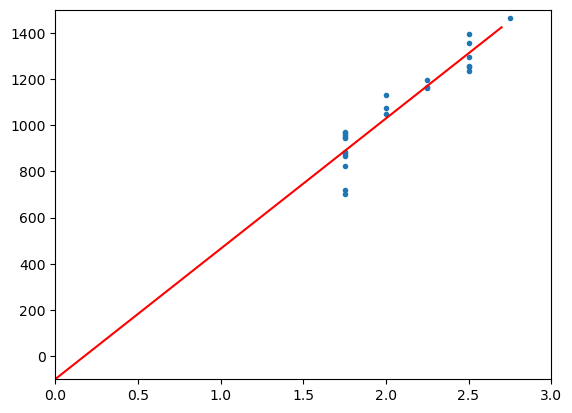

In [6]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

Perform Task 1 in Jupyter Notebook `CE4021-Etivity2-LR.ipynb` provided in the repository for this E-tivity. This notebook contains a reference implementation of linear regression, a simple but very effective machine learning algorithm that we will discuss in more detail during the next semester. 

## Goal 
The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations. 

1. Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm. 
2. Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function `fit`.
3. Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function `predict`.
4. Finally, create a function that returns the weights found by the fit method. Call this function `get_params`.

Please note:

* The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes.
* Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors. 
* Add appropriate comments (doc strings) to the functions you have created.
* At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection. 
* GIT commit your tested code and push to your remote branch. TIP: use your own name in the branch name to help your peers find your code.

## Matrices
The typical form of a $2x2$ matrix is as follows:

$$
M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

### Operations
Linear regressions requires some fundemental matrix operations:

#### Addition/Subtraction/Multiplication
These operations are element-by-element by require that the matrices have the right `shape` for the operation to be valid. 

#### Inverse
Given a 2x2 matrix, 

$$
\text{Let } A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

The determinant of $A$ is given by:

$$
\text{det}(A) = ad - bc
$$

If $det(A)\neq 0$, the inverse of $A$, denoted as $A^{-1}$ is given by:

$$
A^{-1} = \frac{1}{\text{det}(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

#### Transpose
The transpose of a matrix is found by swapping the row and column indices of each element, effectively flipping the matrix over its diagonal.
$$
M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

The transpose of M is given by: 
$$
M^T = \begin{bmatrix} a & c \\ b & d \end{bmatrix}
$$

### Linear Regression
TODO:


## Implementation

### Matrix Utility Functions
Starting with the lower-level functions.

In [7]:
def matrix_addition(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    """
    Assumes A and B are matrices of the same size.
    Returns the result of adding matrices A and B.
    Raises ValueError if the matrices are not of the same size.
    """
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must be of the same size for addition.")

    # shorthand for element-wise addition of two lists    
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]


def matrix_subtraction(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    """
    Assumes A and B are matrices of the same size.
    Returns the result of subtracting matrix B from A.
    Raises ValueError if the matrices are not of the same size.
    """
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must be of the same size for subtraction.")

    # shorthand for element-wise subtraction of two lists        
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]


def matrix_multiplication(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    """
    Assumes the number of columns in A is the same as the number of rows in B.
    Returns the result of multiplying matrix A by matrix B.
    Raises ValueError if the number of columns in A is not the same as the number of rows in B.
    """
    if len(A[0]) != len(B):
        raise ValueError("The number of columns in A must be the same as the number of rows in B for multiplication.")
        
    # shorthand for element-wise multiplication of two lists
    return [[sum(A[i][k] * B[k][j] for k in range(len(A[0]))) for j in range(len(B[0]))] for i in range(len(A))]


### Test Addition, Subtraction and Multiplacation of Matrices

In [14]:
A = [[1.0, 2.0], [3.0, 4.0]]
B = [[5.0, 6.0], [7.0, 8.0]]

print("Matrix A:")
print(A)

print("Matrix B:")
print(B)

print("A + B:")
print(matrix_addition(A, B))

print("A - B:")
print(matrix_subtraction(A, B))

print("A * B:")
print(matrix_multiplication(A, B))

Matrix A:
[[1.0, 2.0], [3.0, 4.0]]
Matrix B:
[[5.0, 6.0], [7.0, 8.0]]
A + B:
[[6.0, 8.0], [10.0, 12.0]]
A - B:
[[-4.0, -4.0], [-4.0, -4.0]]
A * B:
[[19.0, 22.0], [43.0, 50.0]]


### Define Transpose and Invert Functions

In [8]:
def transpose(matrix: list[list[float]]) -> list[list[float]]:
    """
    Calculate the transpose of a 2x2 matrix.
   
    :param matrix: A list representing a 2x2 matrix.
    :return: A list representing the transpose of the input 2x2 matrix.

    Raise a ValueError if the matrix is not 2x2.
    """
    # Check if the input matrix is 2x2
    if len(matrix) != 2 or len(matrix[0]) != 2 or len(matrix[1]) != 2:
        raise ValueError("The input matrix must be 2x2.")
    
    return [[matrix[0][0], matrix[1][0]], [matrix[0][1], matrix[1][1]]]

### Test the Transpose

In [15]:
X = [[1, 2], [3, 4]]
print(f"X:\n{X}")

x_T = transpose(X)
print(f"X transpose:\n{x_T}")

X:
[[1, 2], [3, 4]]
X transpose:
[[1, 3], [2, 4]]


In [9]:
def invert_matrix(matrix: list[list[float]]) -> list[list[float]]:
    """
    Calculate the inverse of a 2x2 matrix.
   
    :param matrix: A list representing a 2x2 matrix.
    :return: A list representing the inverse of the input 2x2 matrix.

    Raise a ValueError if the matrix is singular and non-invertible or if the matrix is not 2x2.
    """
    # Check if the input matrix is 2x2
    if len(matrix) != 2 or len(matrix[0]) != 2 or len(matrix[1]) != 2:
        raise ValueError("The input matrix must be 2x2.")
    
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    det = a * d - b * c
    
    if det == 0:
        raise ValueError("The matrix is singular and non-invertible.")
    
    inv_det = 1 / det
    return [[d * inv_det, -b * inv_det], [-c * inv_det, a * inv_det]]

### Test the inverse

In [16]:
X = [[1, 2], [3, 4]]
print(f"X:\n{X}")

x_invert = invert_matrix(X)

print(f"X invert:\n{x_invert}")
print()

try:
    X = [[1, 2], [1, 2]]
    print(f"X:\n{X}")

    x_invert = invert_matrix(X)

    print(f"X invert:\n{x_invert}")
except ValueError as e:
    print(f"Error: {e}")

X:
[[1, 2], [3, 4]]
X invert:
[[-2.0, 1.0], [1.5, -0.5]]

X:
[[1, 2], [1, 2]]
Error: The matrix is singular and non-invertible.


### Core Linear Regression Functions

In [10]:
def get_params(weights: list[float]) -> list[float]:
    """
    Returns the weights found by the fit method.

    :param weights: A list representing the linear regression weight vector.
    :return: A list representing the weights.
    """
    return weights

In [11]:
def predict(x: list[list[float]], weights: list[float]) -> list[float]:
    """
    Predicts the output using the input data and the linear regression weight vector.

    :param X: A list of lists representing the input data.
    :param weights: A list representing the linear regression weight vector.
    :return: A list representing the predictions.
    """
    raise NotImplementedError 

In [12]:
def fit(x: list[list[float]], y: list[float]) -> list[float]:
    """
    Fits a linear regression model using the least squares method.

    :param X: A list of lists representing the input data.
    :param y: A list representing the output data.
    :return: A list representing the linear regression weight vector.
    """

    raise NotImplementedError 

## Test Core Implementation
Include some examples to demonstrate the happy and sad paths for the main functionaility and the utility functions.

## (Utility) Loading Data from Comma Seperated Value (csv) files
The purpose of this function is to read the data file. The code is specific to the shape of the csv file. I assume that the CSV file is in the same directory as the script and named "data.csv"


In [13]:
file_name = "lr_data.csv"

# Initialize X and y
X = []
y = []

# Open the ascii file and read line by line
try:
    with open(file_name, 'r') as file:      
        # Read each line, split the values on the commas, and append to X and y lists
        for line in file:
            values = line.strip().split(',')
            X.append([float(value) for value in values[:-1]])  # All columns except the last one are inputs
            y.append(float(values[-1]))  # The last column is the output value (that we will predict)
except FileNotFoundError:
    print(f"{file_name} not found.")
except Exception as e:
    print(f"Error reading {file_name}: {e}")

print(f"X values:\n{X}")
print(f"y values:\n{y}")

X values:
[[1.0, 2.75], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.25], [1.0, 2.25], [1.0, 2.25], [1.0, 2.0], [1.0, 2.0], [1.0, 2.0], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75]]
y values:
[1464.0, 1394.0, 1357.0, 1293.0, 1256.0, 1254.0, 1234.0, 1195.0, 1159.0, 1167.0, 1130.0, 1075.0, 1047.0, 965.0, 943.0, 958.0, 971.0, 949.0, 884.0, 866.0, 876.0, 822.0, 704.0, 719.0]


<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.